# The Sparks Foundation
## Domain:  Data Science and Business Analytics
## Batch: November 2021 
## By: Aarushi Gupta

### Task: Prediction using Unsupervised Machine Learning
### Level: Beginner

### From the given IRIS Dataset, predict the optimum number of clusters and present it visually

1. This machine learning project is the benchmark project for any beginner in Machine Learning and usually referred to as the "Hello World". The iris flowers dataset contains numeric attributes. 
2. There are 4 features: sepal length, sepal width, petal length, and petal width.
3. The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import datasets
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(15,5)

### Loading the dataset

In [2]:
# Load the data
iris=pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# chanding the index column to Id
iris.set_index('Id',inplace=True)

In [4]:
print(iris)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
Id                                                                           
1              5.1           3.5            1.4           0.2     Iris-setosa
2              4.9           3.0            1.4           0.2     Iris-setosa
3              4.7           3.2            1.3           0.2     Iris-setosa
4              4.6           3.1            1.5           0.2     Iris-setosa
5              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
146            6.7           3.0            5.2           2.3  Iris-virginica
147            6.3           2.5            5.0           1.9  Iris-virginica
148            6.5           3.0            5.2           2.0  Iris-virginica
149            6.2           3.4            5.4           2.3  Iris-virginica
150            5.9           3.0            5.1           1.8  I

In [5]:
# printing the nice descriptive summary of the data
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Plotting the data

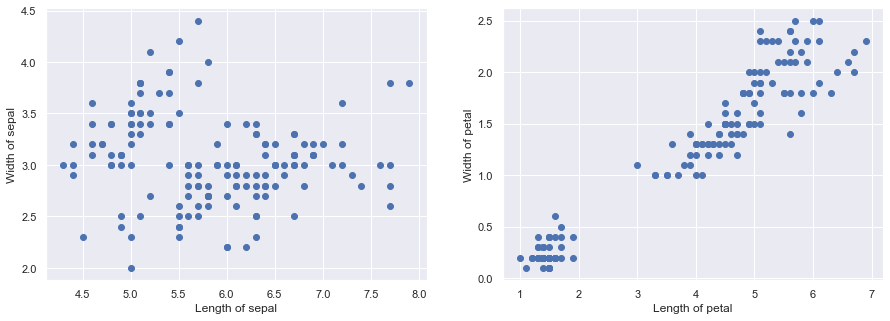

In [6]:
# plot the data
fig,ax=plt.subplots(1,2)
# Create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
ax[0].scatter(iris['SepalLengthCm'],iris['SepalWidthCm'])
# Name your axes
ax[0].set_xlabel('Length of sepal')
ax[0].set_ylabel('Width of sepal')
ax[1].scatter(iris['PetalLengthCm'],iris['PetalWidthCm'])
ax[1].set_xlabel('Length of petal')
ax[1].set_ylabel('Width of petal')
plt.show()

### Importing the relevant libraries for modelling

In [7]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Declaring the dependent and independent variables

In [8]:
y=iris['Species']
x1=iris.drop(['Species'],axis=1)

### Creating the model
#### KMeans Clustering is used for unsupervised machine learning which helps in determining the optimum number of clusters to get the best predicted values from the given dataset

### Taking advantage of Elbow Method

In [9]:
# Elbow method
# Create an empty list
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for. 
#We have it set at 10 right now, but it is completely arbitrary.
cl_num = 10
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(x1)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.34540931571815,
 46.535582051282034,
 38.930963049671746,
 34.2045677933178,
 29.984441493501,
 27.95253787878789]

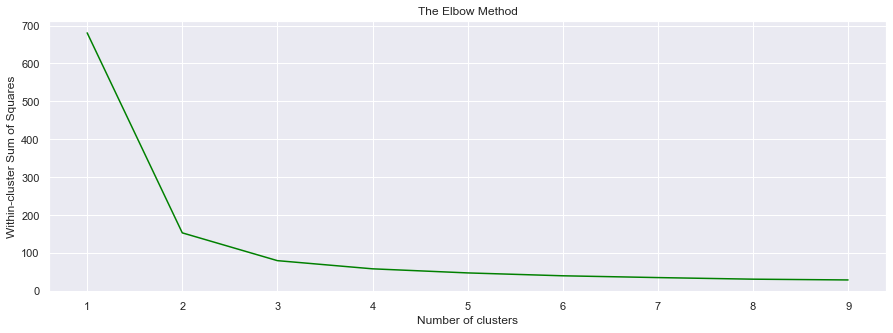

In [10]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss,color='green')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

#### As can be seen, n=3 i.e., three clusters are optimum number of clusters for clustering the iris dataset. Also in reality, there are three species of Iris flowers-
1. Iris- Setosa
2. Iris- Versicolor
3. Iris- Virginica

### Creating the model using Kmeans clustering

In [11]:
kmeans=KMeans(3)
kmeans.fit(x1)

KMeans(n_clusters=3)

In [12]:
prediction=kmeans.predict(x1)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [13]:
cluster=x1.copy()
cluster['Predicted value']=kmeans.predict(x1)
cluster

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicted value
Id,,,,,
1,5.1,3.5,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1
4,4.6,3.1,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,0
148,6.5,3.0,5.2,2.0,2


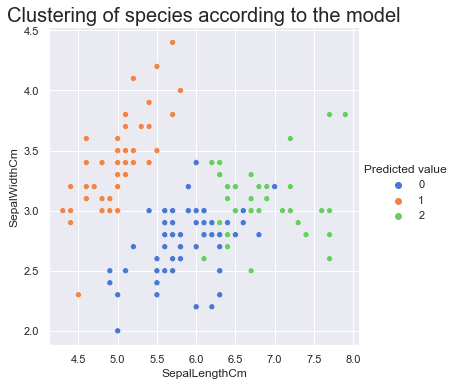

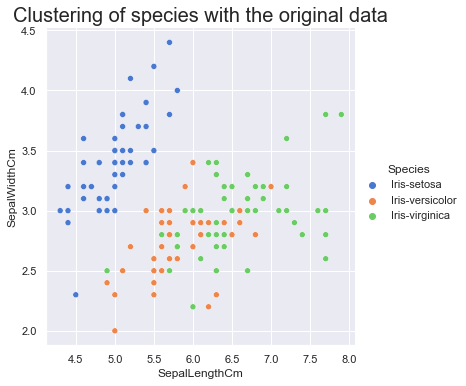

In [14]:
sns.relplot(x='SepalLengthCm',y='SepalWidthCm',hue='Predicted value',data=cluster,palette='muted')
plt.title("Clustering of species according to the model",fontsize=20)
sns.relplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=iris,palette='muted') 
plt.title("Clustering of species with the original data",fontsize=20)
plt.show()

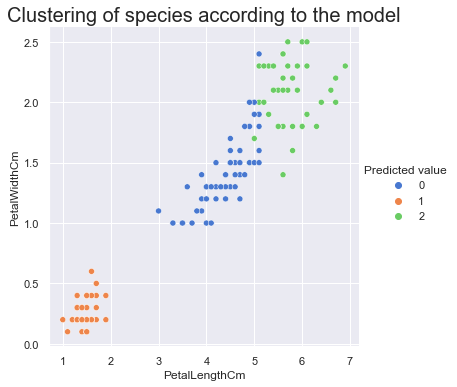

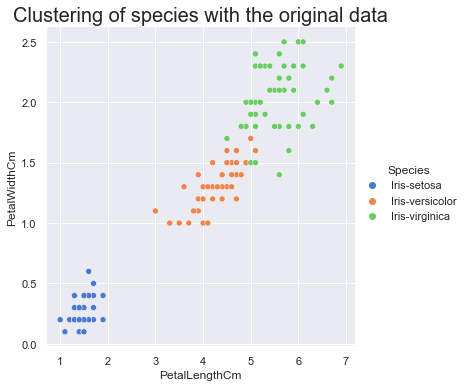

In [15]:
# Similarly for petals
sns.relplot(x='PetalLengthCm',y='PetalWidthCm',hue='Predicted value',data=cluster,palette='muted')
plt.title("Clustering of species according to the model",fontsize=20)
sns.relplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=iris,palette='muted') 
plt.title("Clustering of species with the original data",fontsize=20)
plt.show()

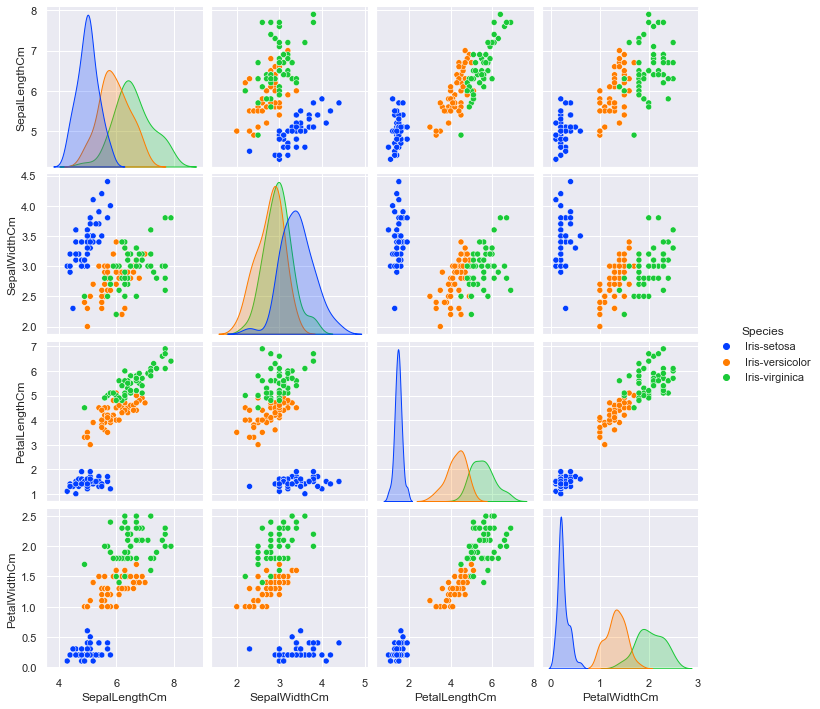

In [16]:
sns.pairplot(iris, hue='Species', height=2.5,palette='bright')

### Measuring the accuracy of the model

In [17]:
cluster['Species']=iris['Species'].map({'Iris-setosa':1,'Iris-versicolor':0,'Iris-virginica':2})

In [18]:
#calculating the f1-score for the model created above
metrics.f1_score(cluster['Species'],prediction,average='micro')

0.8933333333333333

In [19]:
# We can also print a nice summary giving values for precision, recall and f-score using classification report from sklearn
class_report=metrics.classification_report(cluster['Species'],prediction)
print(class_report)

              precision    recall  f1-score   support

           0       0.77      0.96      0.86        50
           1       1.00      1.00      1.00        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150

